In [39]:
import sys
from pathlib import Path
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

# add ../scripts relative to the current notebook
scripts_path = Path(".") / "scripts"
sys.path.append(str(scripts_path))


In [31]:
from wms import (
    LAYER_RGB_125, LAYER_CIR500,
    INDEX_RGB_125, INDEX_CIR500,
    bbox_buffered, getmap_bytes, meta_at_point
)
from plots import plot_plate_1x3

In [32]:
# Load data
squares = gpd.read_file("../data/annotations/vegetated_shingle_squares.shp").to_crs(27700)
ann = gpd.read_file("../data/annotations/vegetated_shingle_examples.shp").to_crs(27700)

In [57]:
# Pick one square
sq = squares.iloc[5].geometry

# set bbox buffer for context
bbox = bbox_buffered(sq.bounds, 15)

# imagery
rgb125 = getmap_bytes(LAYER_RGB_125, bbox, width=1400)
cir500 = getmap_bytes(LAYER_CIR500, bbox, width=1400)
rgb_for_ann = rgb125  # panel 3 uses RGB again

# metadata at centroid
meta_rgb = meta_at_point(INDEX_RGB_125, sq.centroid)
meta_cir = meta_at_point(INDEX_CIR500, sq.centroid)

def fmt(meta):
    d = meta.date_flown.date().isoformat() if pd.notna(meta.date_flown) else "No data"
    return f"{meta.kmreference or ''} | {d}"


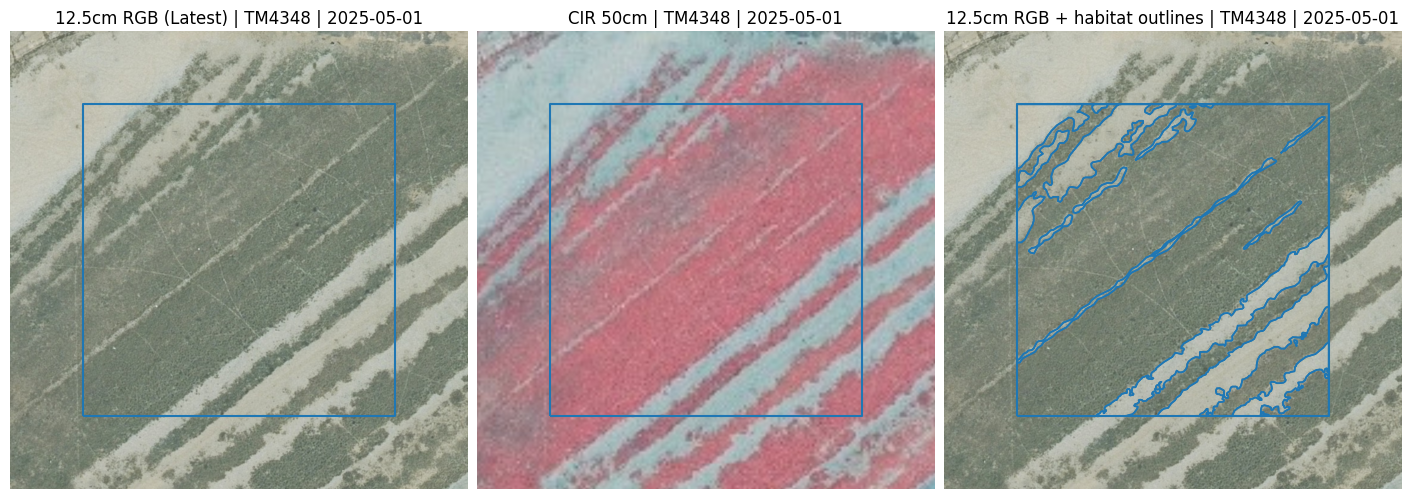

In [58]:
fig = plot_plate_1x3(
    bbox=bbox,
    rgb125_bytes=rgb125,
    cir500_bytes=cir500,
    rgb_anno_bytes=rgb_for_ann,
    sample_geom=sq,
    annotations=ann,
    draw_labels=False,  # <-- no labels
    title1=f"12.5cm RGB (Latest) | {fmt(meta_rgb)}",
    title2=f"CIR 50cm | {fmt(meta_cir)}",
    title3=f"12.5cm RGB + habitat outlines | {fmt(meta_rgb)}",
)
plt.show()